In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from mlxtend.plotting import plot_decision_regions
np.random.seed(13)

In [ ]:
X, y = make_blobs(n_samples = 50000, centers = 5,
                  random_state = 18, cluster_std = 0.60)
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

Text(0, 0.5, 'Feature 2')

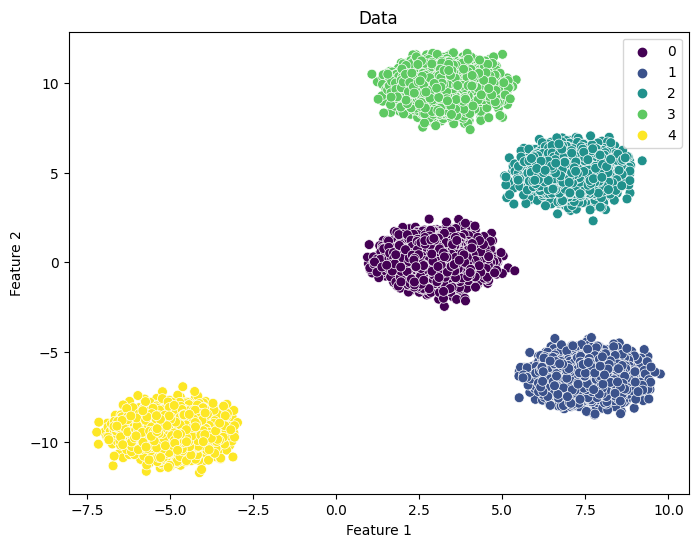

In [ ]:
# Create a scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="viridis", s=50, edgecolor='w', linewidth=0.5)

# Add labels and title
plt.title("Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [2]:
class MultiClass_SVM:
  def __init__(self):
    self.W = None
    self.classes = None
    self.cost = None

  def fit(self, X, y, learning_rate=0.01, epochs=100, regularization=0.0, batch_size=64, random_state = 1):
    X = np.insert(X, 0, 1, axis=1)
    num_samples, num_features = X.shape
    self.classes = np.unique(y)
    num_classes = len(self.classes)
    y = y.reshape(y_train.shape[0], 1)
    y = to_categorical(y)
    self.cost = []

    # Initialize weights
    np.random.seed(random_state)
    if self.W is None:
      self.W = np.random.rand(num_classes, num_features)

    # Training with gradient descent
    for epoch in range(epochs):
      # Shuffle the data
      X, y = shuffle(X, y)
      loss_sum = 0
      # Split the data into batches
      for batch_start in range(0, num_samples, batch_size):
        batch_end = batch_start + batch_size
        X_batch, y_batch = X[batch_start:batch_end], y[batch_start:batch_end]

        # Calculate scores
        scores = X_batch.dot(self.W.T)

        # Compute gradients, loss
        loss , dW = self.calculate_loss(X_batch, y_batch, regularization)

        # Update weights
        self.W -= learning_rate * dW
        loss_sum += loss
      self.cost.append(loss_sum / (num_samples // batch_size))
      if (epoch + 1) % 5 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {self.cost[-1]: .4f}")

  def calculate_loss(self, X, y, regularization = 0.01):
    num_samples = X.shape[0]
    scores = X.dot(self.W.T)

    correct_class_score = np.choose(np.argmax(y, axis=1), scores.T)

    margins = np.maximum(0, scores - correct_class_score[:, np.newaxis] + 1)
    margins[np.arange(margins.shape[0]), np.argmax(y, axis=1)] = 0

    loss = np.sum(margins, axis = (1, 0))
    loss /= num_samples
    loss += 0.5 * regularization * np.sum(self.W * self.W)

    F = (margins > 0).astype(int)
    F[np.arange(F.shape[0]), np.argmax(y, axis=1)] = np.sum(-F, axis=1)
    dW = F.T.dot(X) / num_samples + regularization * self.W

    return loss, dW


  def predict(self, X):
    X = np.insert(X, 0, 1, axis = 1)
    scores = X.dot(self.W.T)
    return np.argmax(scores, axis=1)

  def decision_function(self, X):
    X = np.insert(X, 0, 1, axis=1)
    scores = X.dot(self.W.T)
    return scores


In [ ]:
model = MultiClass_SVM()

In [ ]:
model.fit(X_train, y_train, epochs = 10000, batch_size = 256, learning_rate = 0.1, regularization = 0.00001)

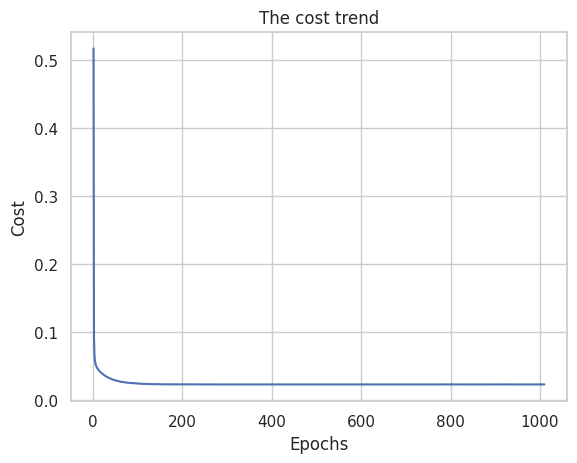

In [ ]:
plt.plot(range(1, len(model.cost) + 1), model.cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('The cost trend')
plt.show()

Accuracy:  1.0000
Lớp 0: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000
Lớp 1: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000
Lớp 2: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000
Lớp 3: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000
Lớp 4: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1968
           1       1.00      1.00      1.00      1977
           2       1.00      1.00      1.00      2022
           3       1.00      1.00      1.00      2054
           4       1.00      1.00      1.00      1979

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



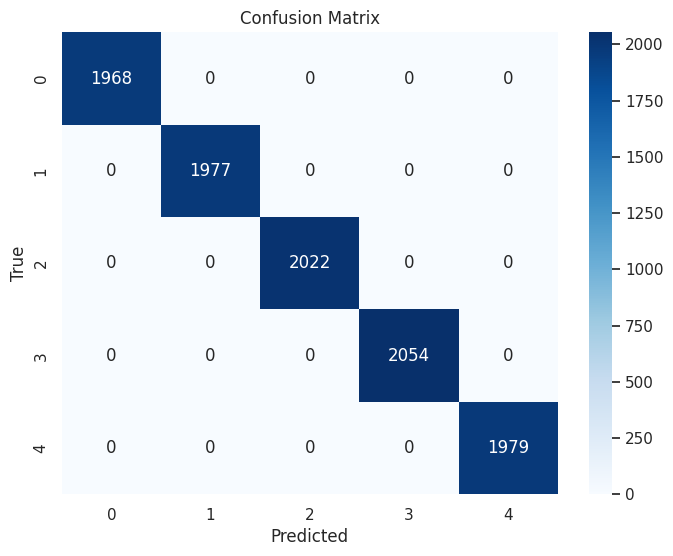

In [ ]:
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


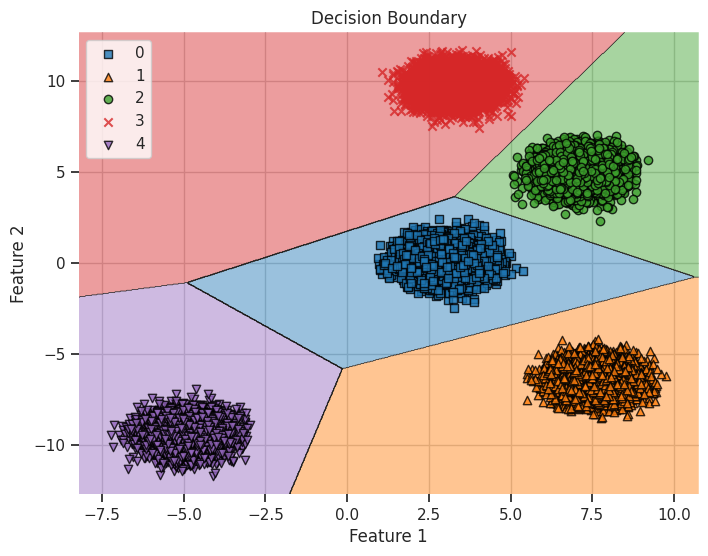

In [ ]:
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y.flatten(), clf=model, legend = 2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.legend()

plot_decision_boundary(model, X_train, y_train)
plt.show()

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

170498071/170498071 [==============================] - 4s 0us/step


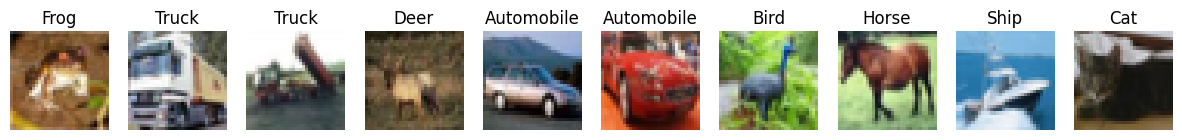

In [4]:
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')

plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [6]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape

(50000, 3072)

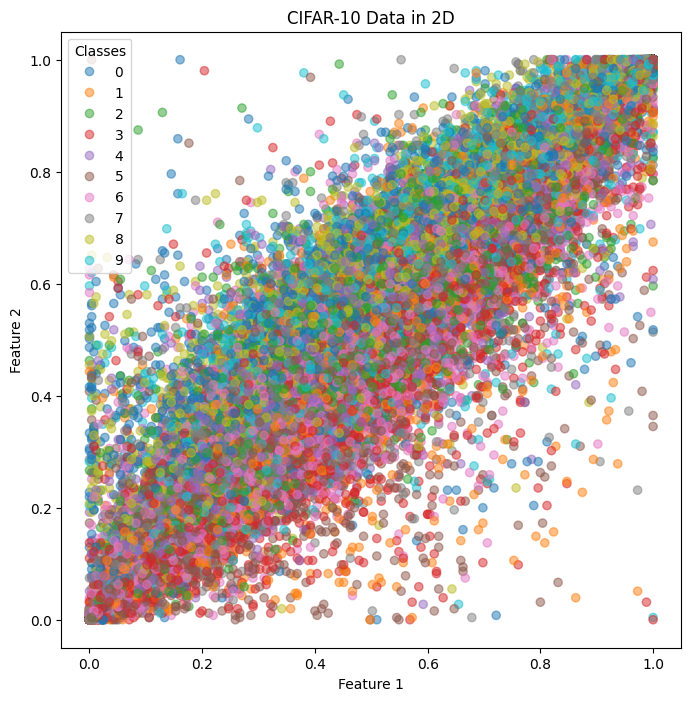

In [7]:
# Hiển thị scatter plot
plt.figure(figsize=(8, 8))
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train[:, 0], cmap='tab10', alpha=0.5)
plt.title('CIFAR-10 Data in 2D')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()


In [8]:
model = MultiClass_SVM()

In [ ]:
model.fit(X_train, y_train, epochs = 100, learning_rate = 0.01, batch_size = 64, regularization = 0.01, random_state = 50)

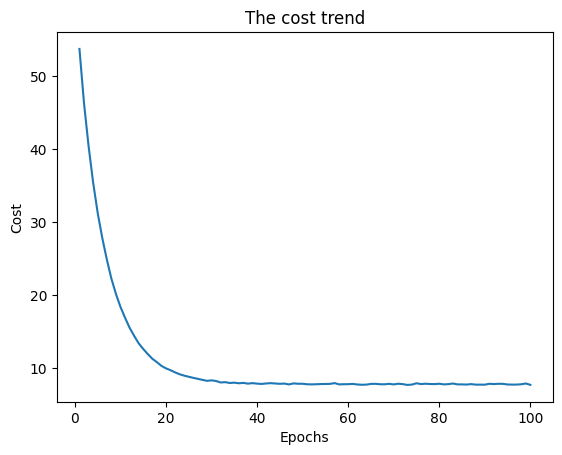

In [11]:
plt.plot(range(1, len(model.cost) + 1), model.cost)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('The cost trend')
plt.show()

Accuracy:  0.2853
Lớp 0: Precision =  0.5333, Recall =  0.0560, F1 Score =  0.1014
Lớp 1: Precision =  0.2731, Recall =  0.5910, F1 Score =  0.3736
Lớp 2: Precision =  0.2143, Recall =  0.0030, F1 Score =  0.0059
Lớp 3: Precision =  0.3814, Recall =  0.0450, F1 Score =  0.0805
Lớp 4: Precision =  0.2252, Recall =  0.6620, F1 Score =  0.3361
Lớp 5: Precision =  0.3030, Recall =  0.0100, F1 Score =  0.0194
Lớp 6: Precision =  0.5556, Recall =  0.2000, F1 Score =  0.2941
Lớp 7: Precision =  0.6134, Recall =  0.1460, F1 Score =  0.2359
Lớp 8: Precision =  0.2505, Recall =  0.8210, F1 Score =  0.3839
Lớp 9: Precision =  0.4242, Recall =  0.3190, F1 Score =  0.3642

               precision    recall  f1-score   support

           0       0.53      0.06      0.10      1000
           1       0.27      0.59      0.37      1000
           2       0.21      0.00      0.01      1000
           3       0.38      0.04      0.08      1000
           4       0.23      0.66      0.34      1000
     

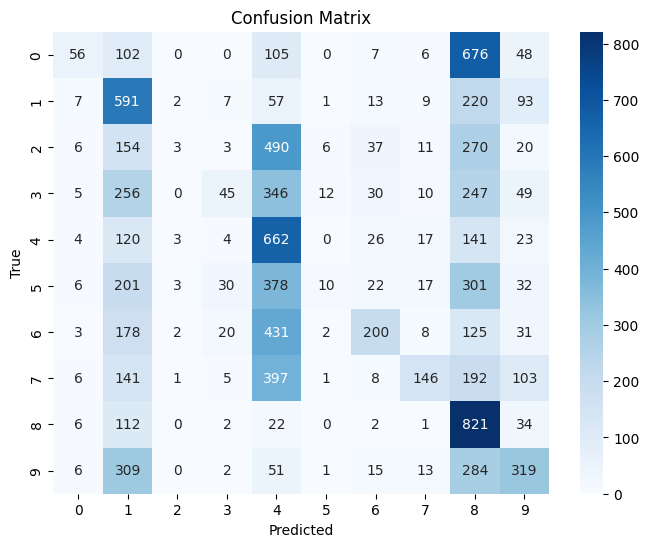

In [12]:
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4,5,6,7,8,9], yticklabels=[0, 1, 2, 3, 4,5,6,7,8,9])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
from sklearn.svm import SVC
SVC = SVC(kernel='linear', C=1, decision_function_shape='ovr', max_iter = 200)
SVC.fit(X_train, y_train.flatten())

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC(C=1, kernel='linear', max_iter=200)

Accuracy:  0.1941
Lớp 0: Precision =  0.3013, Recall =  0.3350, F1 Score =  0.3172
Lớp 1: Precision =  0.1908, Recall =  0.1960, F1 Score =  0.1934
Lớp 2: Precision =  0.1216, Recall =  0.1510, F1 Score =  0.1347
Lớp 3: Precision =  0.1714, Recall =  0.1860, F1 Score =  0.1784
Lớp 4: Precision =  0.1116, Recall =  0.1240, F1 Score =  0.1175
Lớp 5: Precision =  0.1575, Recall =  0.0890, F1 Score =  0.1137
Lớp 6: Precision =  0.2188, Recall =  0.1700, F1 Score =  0.1913
Lớp 7: Precision =  0.1697, Recall =  0.2050, F1 Score =  0.1857
Lớp 8: Precision =  0.2894, Recall =  0.2900, F1 Score =  0.2897
Lớp 9: Precision =  0.2239, Recall =  0.1950, F1 Score =  0.2084

               precision    recall  f1-score   support

           0       0.30      0.34      0.32      1000
           1       0.19      0.20      0.19      1000
           2       0.12      0.15      0.13      1000
           3       0.17      0.19      0.18      1000
           4       0.11      0.12      0.12      1000
     

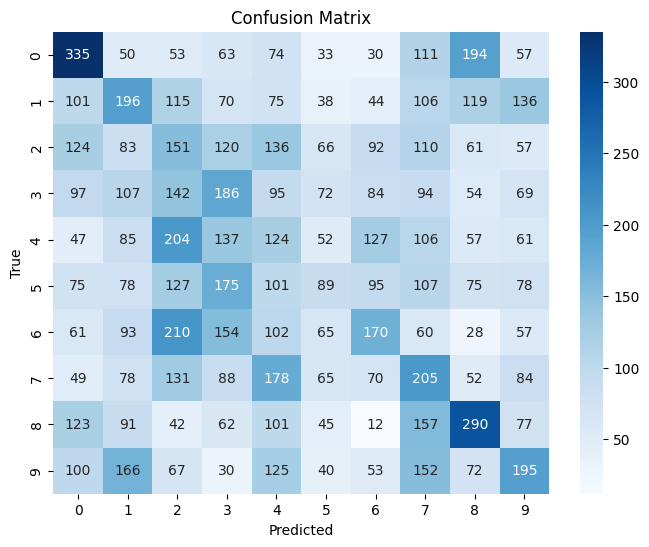

In [14]:
predictions = SVC.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4,5,6,7,8,9], yticklabels=[0, 1, 2, 3, 4,5,6,7,8,9])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()